# Preparing Chicago Crime Dataset for Time Series Analysis

## Load Packages and Set Figures

In [1]:
# Load necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import glob

In [2]:
# Install and load Feature Engineering-Holiday package
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [3]:
# Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

In [4]:
#display more columns
pd.set_option('display.max_columns',50)

---

## Load and Combine datasets

In [5]:
# Set the path to the directory containing your CSV files
csv_files_path = 'Data/*.csv'
# Use the glob module to get a list of all CSV files in the specified directory
csv_file = glob.glob(csv_files_path)
csv_file

['Data/Chicago-Crime_2019.csv',
 'Data/Chicago-Crime_2018.csv',
 'Data/Chicago-Crime_2008.csv',
 'Data/Chicago-Crime_2020.csv',
 'Data/Chicago-Crime_2021.csv',
 'Data/Chicago-Crime_2009.csv',
 'Data/Chicago-Crime_2022.csv',
 'Data/Chicago-Crime_2007.csv',
 'Data/Chicago-Crime_2013.csv',
 'Data/Chicago-Crime_2012.csv',
 'Data/Chicago-Crime_2006.csv',
 'Data/Chicago-Crime_2010.csv',
 'Data/Chicago-Crime_2004.csv',
 'Data/Chicago-Crime_2005.csv',
 'Data/Chicago-Crime_2011.csv',
 'Data/Chicago-Crime_2015.csv',
 'Data/Chicago-Crime_2001.csv',
 'Data/Chicago-Crime_2014.csv',
 'Data/Chicago-Crime_2002.csv',
 'Data/Chicago-Crime_2016.csv',
 'Data/Chicago-Crime_2017.csv',
 'Data/Chicago-Crime_2003.csv']

In [6]:
## Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()
# Iterate through each CSV file and append its data to the combined_data DataFrame
for files in csv_file:
    temp_data = pd.read_csv(files)
    df = df.append(temp_data,ignore_index=True)

/var/folders/3p/yc5rv6f13xg_syq03ll5zv0c0000gn/T/ipykernel_12704/3702940339.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_data,ignore_index=True)
/var/folders/3p/yc5rv6f13xg_syq03ll5zv0c0000gn/T/ipykernel_12704/3702940339.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_data,ignore_index=True)
/var/folders/3p/yc5rv6f13xg_syq03ll5zv0c0000gn/T/ipykernel_12704/3702940339.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_data,ignore_index=True)
/var/folders/3p/yc5rv6f13xg_syq03ll5zv0c0000gn/T/ipykernel_12704/3702940339.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

In [7]:
# Check data to make sure all years are included
df['Date'].sort_values()

5449749    01/01/2001 01:00:00 AM
5449725    01/01/2001 01:00:00 AM
5449726    01/01/2001 01:00:00 AM
5449727    01/01/2001 01:00:00 AM
5449767    01/01/2001 01:00:00 AM
                    ...          
2010105    12/31/2022 12:50:00 PM
2010106    12/31/2022 12:50:00 PM
2010107    12/31/2022 12:52:00 AM
2010108    12/31/2022 12:52:00 PM
2010109    12/31/2022 12:59:00 PM
Name: Date, Length: 7713109, dtype: object

---

## Inspecting Dataset

In [8]:
# Preview dataset and get 'info'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958
1,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1834,18.0,42.0,41.892659,-87.616600
2,11559315,01/01/2019 01:00:00 PM,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,True,1022,10.0,24.0,41.862529,-87.703930
3,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
4,12339426,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,824,8.0,16.0,NaN,NaN


- There are 7713109 rows and 12 columns.

---

## Add Holidays to Database for Analysis

In [9]:
## making a date range that covers full dataset
all_days = pd.date_range(df['Date'].min(),df['Date'].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [10]:
# Create an instance of the US country holidays.
us_holidays = country_holidays('US')

In [11]:
# Getting a holiday list for all dates
holiday_list = [us_holidays.get(day) for day in all_days]

In [12]:
# Saving holiday types as column
df['US Holiday'] = [us_holidays.get(day) for day in df['Date']]
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,New Year's Day
1,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1834,18.0,42.0,41.892659,-87.616600,New Year's Day
2,11559315,01/01/2019 01:00:00 PM,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,True,1022,10.0,24.0,41.862529,-87.703930,New Year's Day
3,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,New Year's Day
4,12339426,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,824,8.0,16.0,NaN,NaN,New Year's Day


---

## Saving 2 Forms of Data for Analysis

In [13]:
# 1st form of data with a datatime index (Each row is 1 crime)
# Change Date column data type to a timeseries dtype 
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [14]:
# Set 'Date' as index 
df = df.set_index('Date')
df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
Date,,,,,,,,,,,,
2019-01-01 13:00:00,12149675,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,New Year's Day
2019-01-01 01:00:00,11574022,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1834,18.0,42.0,41.892659,-87.616600,New Year's Day
2019-01-01 13:00:00,11559315,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,True,1022,10.0,24.0,41.862529,-87.703930,New Year's Day


In [19]:
# Sort index to have timeseries in order and save df name as 'df_irr'
df_irr = df.sort_index()
df_irr

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
Date,,,,,,,,,,,,
2001-01-01 00:00:00,3272413,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,17.0,41.756087,-87.642812,New Year's Day
2001-01-01 00:00:00,2619446,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,1013,10.0,22.0,41.850386,-87.715108,New Year's Day
2001-01-01 00:00:00,2896880,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,231,2.0,3.0,41.804197,-87.626096,New Year's Day
2001-01-01 00:00:00,5044499,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,932,9.0,16.0,41.799264,-87.670955,New Year's Day
2001-01-01 00:00:00,1541842,DECEPTIVE PRACTICE,EMBEZZLEMENT,AIRPORT/AIRCRAFT,True,False,1651,16.0,NaN,NaN,NaN,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399,None
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399,None
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744,None


In [21]:
# 2nd form of data with resampled/converted crime counts ( Each row is 1 day)
# Group by 'Primary Type', resample to daily and aggregated by .size()
primary_type=df_irr.groupby('Primary Type').resample('D').size()

In [25]:
df_reg = primary_type.unstack(level=0)
df_reg.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,NaN,70.0,296.0,66.0,NaN,38.0,233.0,3.0,29.0,94.0,NaN,2.0,2.0,NaN,1.0,1.0,2.0,3.0,60.0,97.0,NaN,NaN,NaN,NaN,100.0,NaN,167.0,5.0,NaN,5.0,NaN,41.0,65.0,1.0,412.0,32.0
2001-01-02,NaN,66.0,143.0,68.0,NaN,2.0,118.0,0.0,35.0,78.0,NaN,1.0,0.0,NaN,1.0,1.0,1.0,2.0,65.0,175.0,NaN,NaN,NaN,NaN,4.0,NaN,101.0,11.0,NaN,2.0,NaN,35.0,4.0,0.0,221.0,9.0
2001-01-03,1.0,79.0,165.0,57.0,NaN,7.0,136.0,0.0,35.0,49.0,NaN,0.0,0.0,NaN,0.0,0.0,3.0,2.0,72.0,133.0,NaN,NaN,NaN,NaN,3.0,NaN,96.0,16.0,NaN,7.0,NaN,51.0,5.0,1.0,226.0,7.0
2001-01-04,1.0,57.0,173.0,55.0,NaN,2.0,133.0,0.0,29.0,42.0,NaN,2.0,2.0,NaN,3.0,1.0,2.0,4.0,87.0,142.0,NaN,NaN,NaN,NaN,5.0,NaN,96.0,19.0,NaN,3.0,NaN,55.0,1.0,0.0,243.0,9.0
2001-01-05,3.0,68.0,178.0,55.0,NaN,6.0,142.0,0.0,29.0,53.0,NaN,0.0,1.0,NaN,2.0,0.0,3.0,8.0,86.0,185.0,NaN,NaN,NaN,NaN,9.0,NaN,90.0,16.0,NaN,5.0,NaN,55.0,2.0,0.0,265.0,6.0


---

## Chicago Crime Data EDA

### Comparing Police Districts

#### Which district had the most crimes in 2022?

In [37]:
# Slice out year 2022 from our irregular dataset
most_crime = df_irr.loc['2022']

In [64]:
# Inspect the value_counts for the different districts
crime_counts = most_crime['District'].value_counts().to_frame('Crime Counts in each District 2022')

In [65]:
crime_counts.style.bar('Crime Counts in each District 2022')

,Crime Counts in each District 2022
8.000000,14805
6.000000,14694
12.000000,14341
4.000000,13931
11.000000,13457
1.000000,13044
18.000000,12429
19.000000,12243
25.000000,11951
3.000000,11937


**Police district 8 had the highest crime counts of 14805 in year 2022**

#### Which had the least?

**Police district 31 had the least crime counts of 15 in year 2022**

---

### Crimes Across the Years

#### Is the total number of crimes increasing or decreasing across the years?

In [94]:
# Resample as daily with .size()
crime_across = df_irr.resample('Y').size()
crime_across

Date
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
2006-12-31    448179
2007-12-31    437087
2008-12-31    427183
2009-12-31    392827
2010-12-31    370513
2011-12-31    351993
2012-12-31    336319
2013-12-31    307536
2014-12-31    275789
2015-12-31    264787
2016-12-31    269823
2017-12-31    269100
2018-12-31    268899
2019-12-31    261325
2020-12-31    212194
2021-12-31    208824
2022-12-31    238858
Freq: A-DEC, dtype: int64

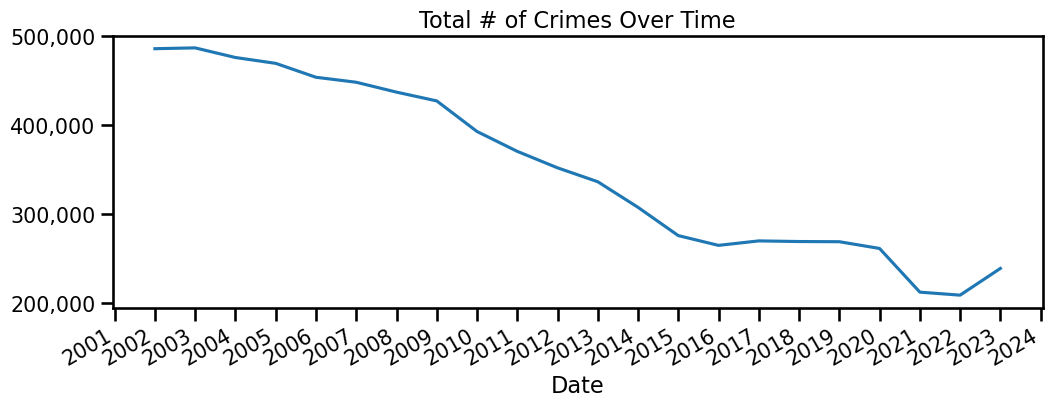

In [97]:
# Plot a cumulative sum of total number of crime
fig, ax = plt.subplots(figsize=(12,4))
crime_across.plot(ax=ax,title='Total # of Crimes Over Time',x_compat=True)
loc_year = mdates.YearLocator(1)
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show();

- The total # of crimes in Chicago has decreased from 2001 to 2016.
- The total # of crimes stay almost the same from 2016 to 2020.
- We see a sharp decrease from 2020 to 2021 (which might be the cause of COVID-19).
- From 2021 to 2022 the # of crime stays almost the same.
- We see a sharp increase in crime from 2022 to 2023. We have not seen such rapid increase in crime # since 2001.

#### Are there any individual crimes that are doing the opposite?

/var/folders/3p/yc5rv6f13xg_syq03ll5zv0c0000gn/T/ipykernel_12704/1067455489.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=3.0);


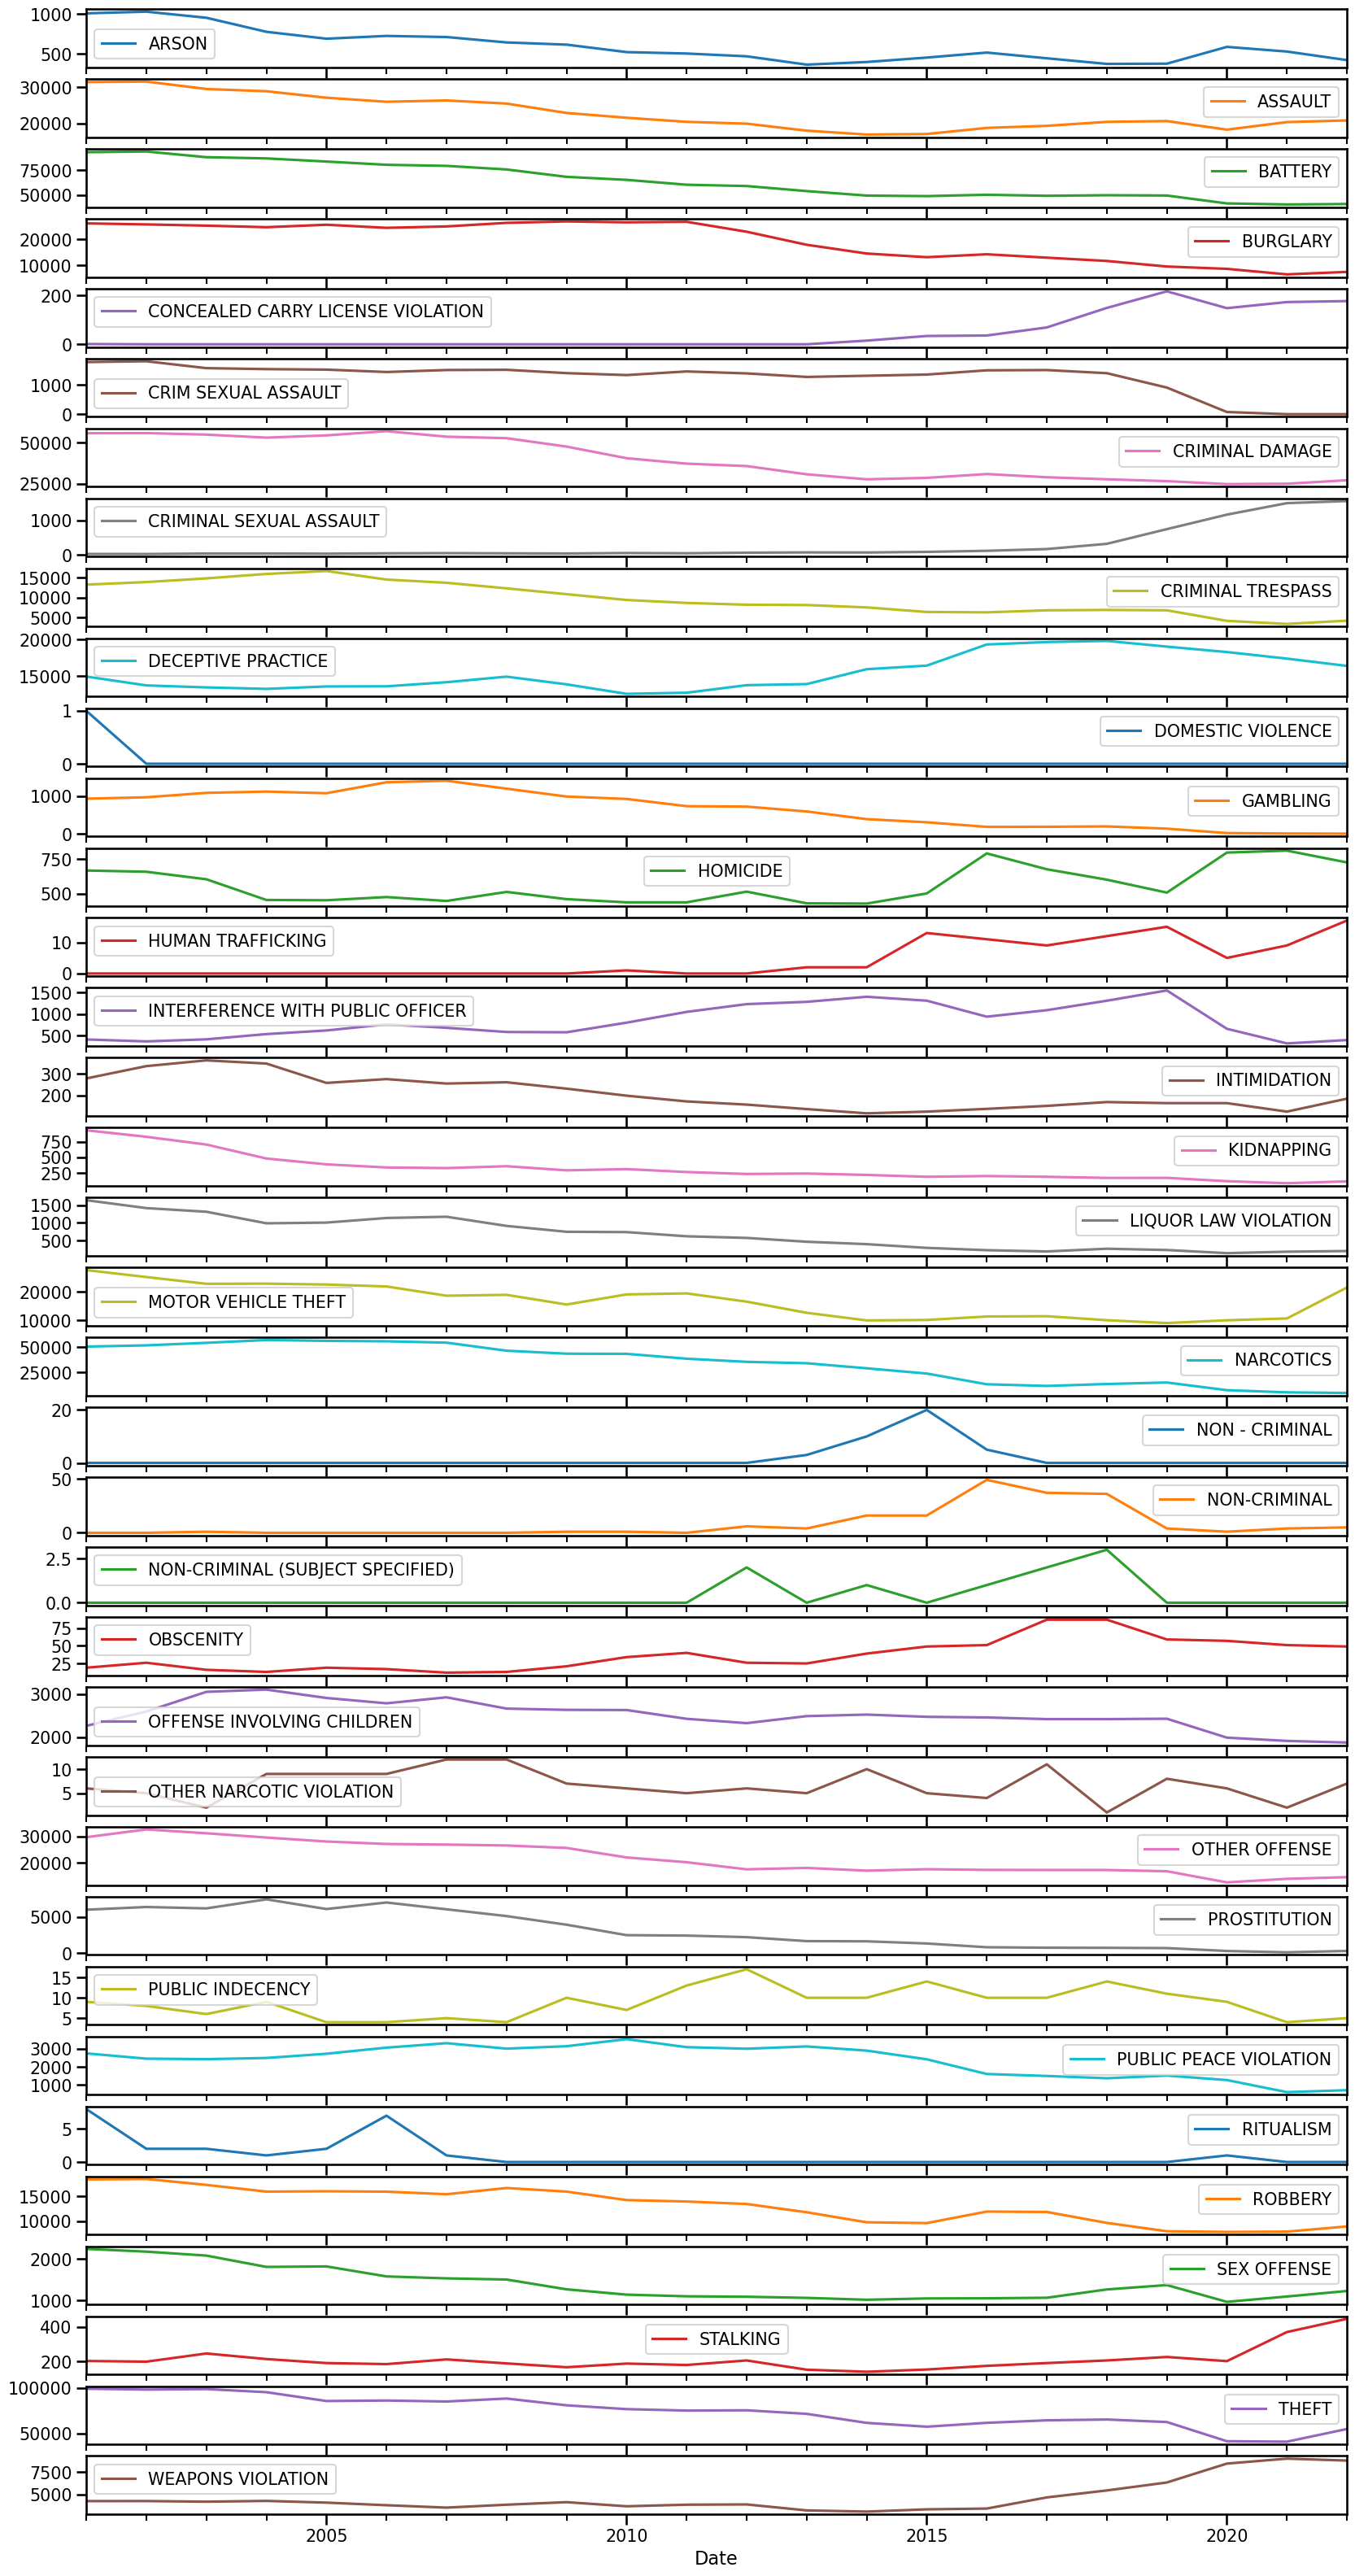

In [108]:
df_reg_resampled = df_reg.resample('Y').sum()
df_reg_resampled.plot(subplots=True, sharey=False, 
                      sharex=False, layout=(-1, 1),
                      figsize=(20,40))
plt.tight_layout(pad=3.0);

Below are the types of crime that are opposite of the # total crime trend:

CONCEALED CARRY LICENSE VIOLATION,DECEPTIVE PRACTICE,PUBLIC INDECENCY,OBSCENITY,
INTERFERENCE WITH PUBLIC OFFICER,HUMAN TRAFFICKING,DECEPTIVE PRACTICE

---

### Comparing Holidays

#### Top 3 holidays with the largest number of crimes

In [112]:
# Obtain value count of 'US Holiday' column and save as a new df
holiday_crimes = df_irr['US Holiday'].value_counts().nlargest(5)

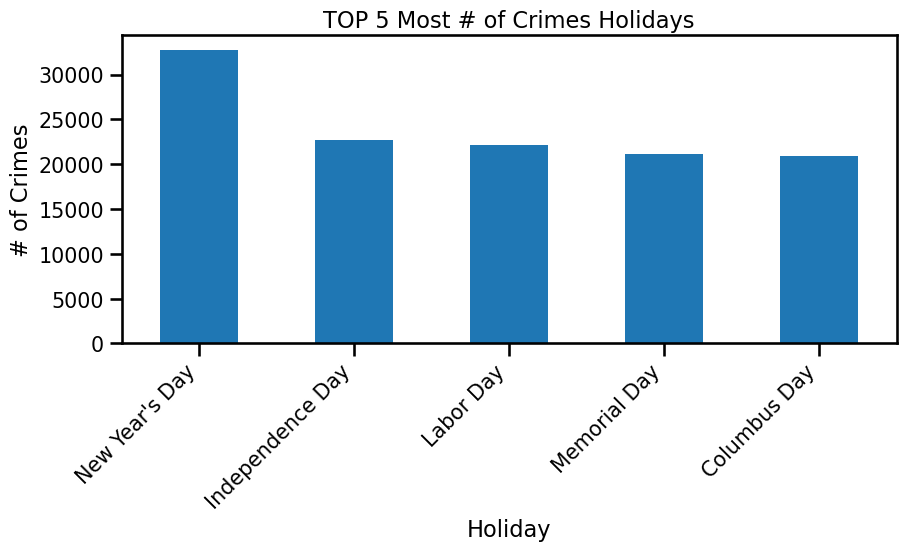

In [124]:
# Plot to show crimes # on holidays (Observed holiday counts as a different holiday date)
fig,ax = plt.subplots(figsize=(10, 4))
holiday_crimes.plot(kind='bar',ax=ax)
ax.set(title='TOP 5 Most # of Crimes Holidays',ylabel='# of Crimes',xlabel='Holiday')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

**The top 3 holidays that had the most # of crimes are: New Year's Day, Independence Day, Labor Day.**

#### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [126]:
# Value counts on Primary type groupby US holiday to get # of crime of all type of crimes on all holidays
holiday = df_irr.groupby('US Holiday')['Primary Type'].value_counts()
holiday = holiday.to_frame('# of Crimes')
holiday

# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      KIDNAPPING                                  11
                      INTIMIDATION                                10
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

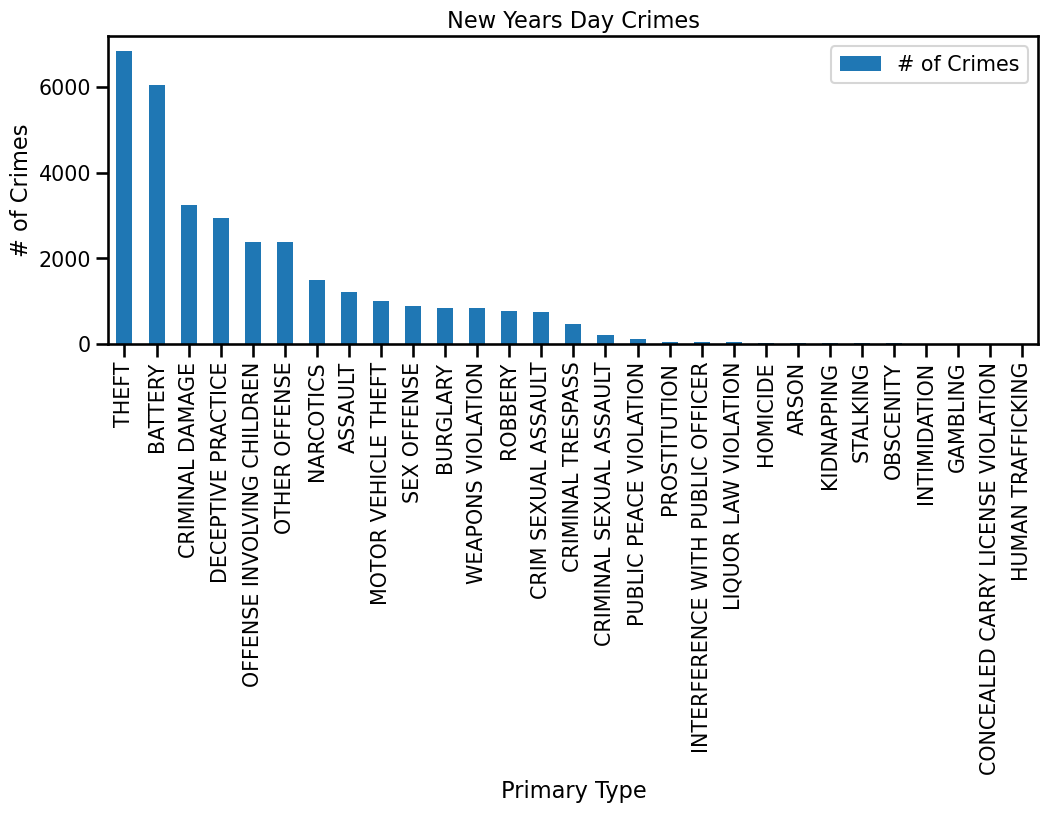

In [136]:
# Plot New Year's Day crimes counts by types
ax = holiday.loc["New Year's Day"].plot(kind='bar')
ax.set(title="New Years Day Crimes", ylabel='# of Crimes');

**Top 5 most common crimes on New Year's Day are: Theft, Battery, Criminal Damage, Deceptive Practice, and Offense Involving Children.**

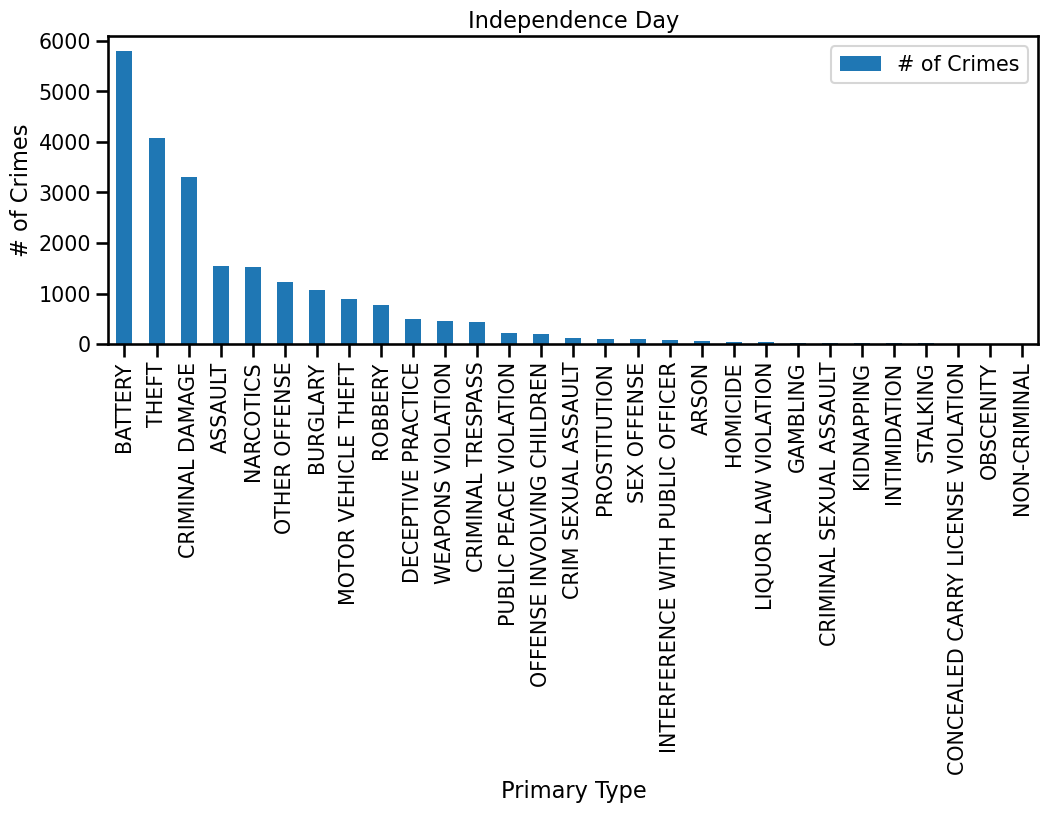

In [137]:
# Plot New Year's Day crimes counts by types
ax = holiday.loc["Independence Day"].plot(kind='bar')
ax.set(title="Independence Day", ylabel='# of Crimes');

**Top 5 most common crimes on Independence Day are: Battery, Theft, Criminal Damage, Assault, Narcotics.**

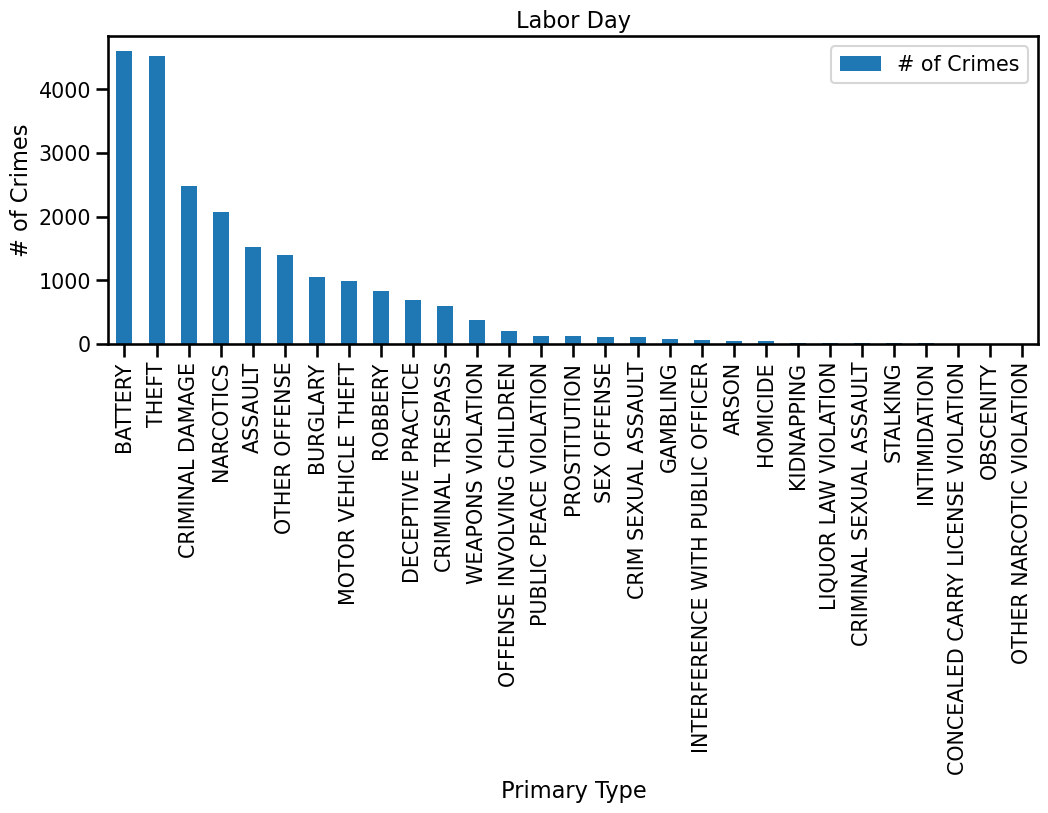

In [138]:
# Plot Labor Day crimes count by types
ax = holiday.loc["Labor Day"].plot(kind='bar')
ax.set(title="Labor Day", ylabel='# of Crimes');

**Top 5 most common crimes on Labor Day are: Battery, Theft, Criminal Damage, Narcotics, and Assault.**